# Exploring the TPE file

In [1]:
%matplotlib notebook

In [22]:
# imports
from scipy.io import readsav

import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

from astropy.coordinates import SkyCoord

from specdb.specdb import IgmSpec

## Load

In [3]:
svfile = os.getenv('DROPBOX_DIR')+'QSOPairs/TPE_DR12/TPE_DR12_Mon-May-16-18:00:17-2016_concat.sav'

In [4]:
tpe_sav = readsav(svfile)

In [5]:
tpe_sav.keys()

['comment', 'omega_m', 'omega_v', 'qso_fg', 'w', 'qso_bg', 'lit_h']

In [6]:
tpe_sav['qso_bg'].dtype.names

('RUN',
 'RERUN',
 'CAMCOL',
 'FIELD',
 'ID',
 'PARENT',
 'NCHILD',
 'OBJC_TYPE',
 'OBJC_PROB_PSF',
 'OBJC_FLAGS',
 'OBJC_FLAGS2',
 'OBJC_ROWC',
 'OBJC_ROWCERR',
 'OBJC_COLC',
 'OBJC_COLCERR',
 'ROWV',
 'ROWVERR',
 'COLV',
 'COLVERR',
 'ROWC',
 'ROWCERR',
 'COLC',
 'COLCERR',
 'PSFCOUNTSERR',
 'FIBERCOUNTSERR',
 'FIBER2COUNTSERR',
 'PETROCOUNTSERR',
 'PETRORAD',
 'PETRORADERR',
 'PETROR50',
 'PETROR50ERR',
 'PETROR90',
 'PETROR90ERR',
 'Q',
 'QERR',
 'U',
 'UERR',
 'M_E1',
 'M_E2',
 'M_E1E1ERR',
 'M_E1E2ERR',
 'M_E2E2ERR',
 'M_RR_CC',
 'M_RR_CCERR',
 'M_CR4',
 'M_E1_PSF',
 'M_E2_PSF',
 'M_RR_CC_PSF',
 'M_CR4_PSF',
 'ISO_ROWC',
 'ISO_ROWCERR',
 'ISO_ROWCGRAD',
 'ISO_COLC',
 'ISO_COLCERR',
 'ISO_COLCGRAD',
 'ISO_A',
 'ISO_AERR',
 'ISO_AGRAD',
 'ISO_B',
 'ISO_BERR',
 'ISO_BGRAD',
 'ISO_PHIGRAD',
 'R_DEV',
 'R_DEVERR',
 'AB_DEV',
 'AB_DEVERR',
 'COUNTS_DEVERR',
 'R_EXP',
 'R_EXPERR',
 'AB_EXP',
 'AB_EXPERR',
 'COUNTS_EXPERR',
 'COUNTS_MODELERR',
 'STAR_LNL',
 'EXP_LNL',
 'DEV_LNL',
 'FRACP

In [7]:
for key in ['omega_m', 'omega_v', 'w', 'lit_h', 'comment']:
    print('key={:s}, {}'.format(key, tpe_sav[key]))

key=omega_m, 0.26
key=omega_v, 0.74
key=w, -1.0
key=lit_h, 0.7
key=comment, [ (0, 'OBSERVED', 'G_UV =      4.3; LOGL_LL=31.12;    S/N =     -1.0 ;   J = 17.98, H = 17.84, K = 17.41')
 (0, 'OBSERVED', 'G_UV =      3.2; LOGL_LL=31.12;    S/N =     -1.0 ;   J = 17.98, H = 17.84, K = 17.41')
 (0, 'OBSERVED', 'G_UV =      4.3; LOGL_LL=30.91;    S/N =     -1.0 ;   J = 18.65, H = 18.47, K = 18.18')
 ...,
 (0, 'OBSERVED', 'G_UV =      0.6; LOGL_LL=30.89;    S/N =     -1.0 ;   J = 18.37, H = 18.28, K = 18.15')
 (0, 'OBSERVED', 'G_UV =      0.1; LOGL_LL=30.07;    S/N =     -1.0 ;   J = 20.19, H = 20.09, K = 19.97')
 (0, 'OBSERVED', 'G_UV =      1.2; LOGL_LL=30.87;    S/N =     -1.0 ;   J = 18.78, H = 18.69, K = 18.30')]


In [8]:
type(tpe_sav['comment'])

numpy.recarray

In [9]:
nobj = len(tpe_sav['qso_fg'])
nobj

6928

## Convert to something Pythonic
    Not so easy to write to hard-drive as this has nested objects
    Punting for now...

In [10]:
qso_fg = Table(tpe_sav['qso_fg'])

In [11]:
qso_bg = Table(tpe_sav['qso_bg'])

## Luminosity cuts

In [12]:
bright = qso_fg['LOGLV'] > 31.5
np.sum(bright)

145

In [13]:
bright_bg = qso_bg[bright]

### Plot a few

In [14]:
igmsp = IgmSpec()

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_v02.hdf5 for the catalog file
Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_v02.hdf5 for the DB file
Available surveys: [u'BOSS_DR12', u'HSTQSO', u'SDSS_DR7', u'KODIAQ_DR1', u'HD-LLS_DR1', u'2QZ', u'ESI_DLA', u'HDLA100', u'GGG', u'COS-Halos', u'HST_z2', u'COS-Dwarfs', u'XQ-100']
Database is igmspec
Created on 2016-Oct-10


In [15]:
idx = 0
spec, meta = igmsp.spec_from_coord((bright_bg['RA'][idx], bright_bg['DEC'][idx]))
if spec is not None:
    spec[0].plot()
else:
    print("QSO with RA={:g} and DEC={:g} is not in IgmSpec (i.e. Paris or Schneider)".format(
        bright_bg['RA'][idx], bright_bg['DEC'][idx]))

Your search yielded 0 match[es]
QSO with RA=8.45329 and DEC=0.467257 is not in IgmSpec (i.e. Paris or Schneider)


/Users/xavier/local/Python/specdb/specdb/specdb.py:85: UserWarning: No sources found at your coordinate.  Returning none
  warnings.warn("No sources found at your coordinate.  Returning none")


## Sample plot -- $z$ vs $g_{\rm UV}$ vs $L_\nu$

### Some queries to begin

In [16]:
# Largest cut
i31 = qso_fg['LOGLV'] > 31.0
b31 = qso_bg[i31]
f31 = qso_fg[i31]
np.sum(i31)

901

In [20]:
# Generate coords
b31_coords = SkyCoord(ra=b31['RA'], dec=b31['DEC'], unit='deg')
f31_coords = SkyCoord(ra=f31['RA'], dec=f31['DEC'], unit='deg')

In [23]:
# Query in IgmSpec
bin_igmsp = igmsp.qcat.match_coord(b31_coords)
fin_igmsp = igmsp.qcat.match_coord(f31_coords)
in_igmsp = (bin_igmsp > -1) & (fin_igmsp > -1)
#
np.sum(bin_igmsp > -1), np.sum(fin_igmsp > -1), np.sum(in_igmsp)

Your search yielded 584 matches
Your search yielded 719 matches


(584, 719, 550)

### Plot

<IPython.core.display.Javascript object>


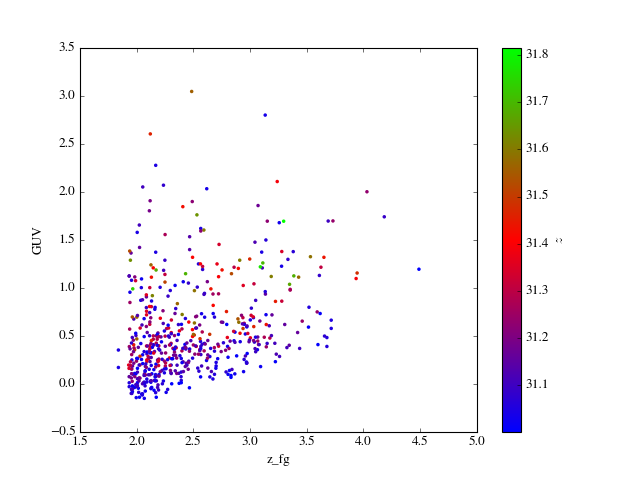

In [33]:
plt.clf()
# In IgmSpec
jet = cm = plt.get_cmap('brg') 
mpl = plt.scatter(f31['Z_TOT'][in_igmsp], np.log10(f31['G_UV'][in_igmsp]),
        c=f31['LOGLV'][in_igmsp], marker='o', s=10., edgecolors='none', cmap=cm)
#plt.scatter(f31['Z_TOT'][~in_igmsp], np.log10(f31['G_UV'][~in_igmsp]),
#        c=f31['LOGLV'][~in_igmsp], marker='s', s=5., edgecolors='none', cmap=cm)
#mpl.set_clim(vmin=0.6, vmax=1.5)
cb = plt.colorbar(mpl)
cb.set_label(r'$z$')
# Labels
plt.xlabel('z_fg')
plt.ylabel('GUV')
plt.show()

In [24]:
b31.keys()

['RUN',
 'RERUN',
 'CAMCOL',
 'FIELD',
 'ID',
 'PARENT',
 'NCHILD',
 'OBJC_TYPE',
 'OBJC_PROB_PSF',
 'OBJC_FLAGS',
 'OBJC_FLAGS2',
 'OBJC_ROWC',
 'OBJC_ROWCERR',
 'OBJC_COLC',
 'OBJC_COLCERR',
 'ROWV',
 'ROWVERR',
 'COLV',
 'COLVERR',
 'ROWC',
 'ROWCERR',
 'COLC',
 'COLCERR',
 'PSFCOUNTSERR',
 'FIBERCOUNTSERR',
 'FIBER2COUNTSERR',
 'PETROCOUNTSERR',
 'PETRORAD',
 'PETRORADERR',
 'PETROR50',
 'PETROR50ERR',
 'PETROR90',
 'PETROR90ERR',
 'Q',
 'QERR',
 'U',
 'UERR',
 'M_E1',
 'M_E2',
 'M_E1E1ERR',
 'M_E1E2ERR',
 'M_E2E2ERR',
 'M_RR_CC',
 'M_RR_CCERR',
 'M_CR4',
 'M_E1_PSF',
 'M_E2_PSF',
 'M_RR_CC_PSF',
 'M_CR4_PSF',
 'ISO_ROWC',
 'ISO_ROWCERR',
 'ISO_ROWCGRAD',
 'ISO_COLC',
 'ISO_COLCERR',
 'ISO_COLCGRAD',
 'ISO_A',
 'ISO_AERR',
 'ISO_AGRAD',
 'ISO_B',
 'ISO_BERR',
 'ISO_BGRAD',
 'ISO_PHIGRAD',
 'R_DEV',
 'R_DEVERR',
 'AB_DEV',
 'AB_DEVERR',
 'COUNTS_DEVERR',
 'R_EXP',
 'R_EXPERR',
 'AB_EXP',
 'AB_EXPERR',
 'COUNTS_EXPERR',
 'COUNTS_MODELERR',
 'STAR_LNL',
 'EXP_LNL',
 'DEV_LNL',
 'FRACP